<h2>Q4:由學術動機與抑鬱值、心理壓力的相關性，以探討學習的熱忱的高低是否會影響抑鬱值和心理壓力</h2>

In [2]:
# modules we'll use
import pandas as pd
import numpy as np
import seaborn as sb
import scipy.stats
import statsmodels.stats.weightstats
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import scipy.stats
# read in our data
med_df = pd.read_csv("C:/Users/ASUS/Desktop/Data Carrard et al. 2022 MedTeach.csv")
med_df.head(5)

,id,age,year,sex,glang,part,job,stud_h,health,psyt,jspe,qcae_cog,qcae_aff,amsp,erec_mean,cesd,stai_t,mbi_ex,mbi_cy,mbi_ea
0,2,18,1,1,120,1,0,56,3,0,88,62,27,17,0.738095,34,61,17,13,20
1,4,26,4,1,1,1,0,20,4,0,109,55,37,22,0.690476,7,33,14,11,26
2,9,21,3,2,1,0,0,36,3,0,106,64,39,17,0.690476,25,73,24,7,23
3,10,21,2,2,1,0,1,51,5,0,101,52,33,18,0.833333,17,48,16,10,21
4,13,21,3,1,1,1,0,22,4,0,102,58,28,21,0.690476,14,46,22,14,23


<h2>描述統計</h2>
<h3>透過heatmap圖，得到學術動機(asmp)、抑鬱值(cesd)、心理壓力(psyt) 彼此的相關係數</h3>

[Text(50.722222222222214, 0.5, 'Psychological stress    Depression value      Motivation               '),
 Text(0.5, 23.52222222222222, '             Motivation      Depression value  Psychological stress   ')]

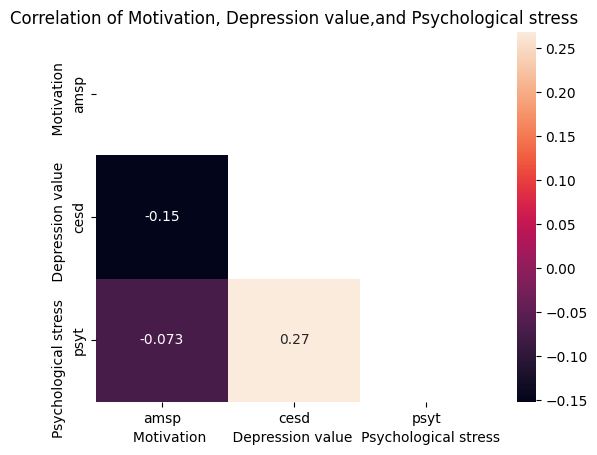

In [3]:
categorical = med_df[['amsp', 'cesd', 'psyt']].copy()
corr = categorical.corr()
matrix = np.triu(corr)
# using the upper triangle matrix as mask 
ax = sb.heatmap(corr, annot=True, mask=matrix)
ax.set_title("Correlation of Motivation, Depression value,and Psychological stress")
ax.set(ylabel="Psychological stress    Depression value      Motivation               ",xlabel="             Motivation      Depression value  Psychological stress   ")

<h3>學術動機和抑鬱值與心理壓力的相關係數，分別為-0.15, -0.073</h3>

<h3>接下來利用圖表簡單觀察，當學術動機越高時，抑鬱值和心理壓力會有什麼變化</h3>

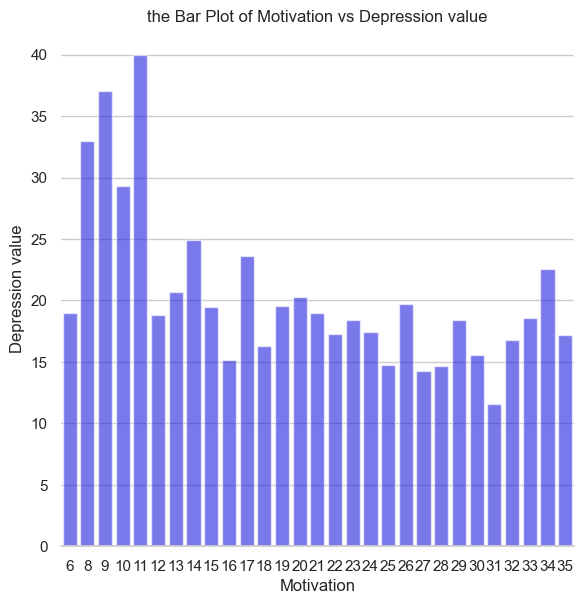

In [4]:
# amsp、 cesd、psyt
sb.set(style="whitegrid")
ax = sb.catplot(data = med_df,kind="bar",x="amsp", y= "cesd", color='blue',errorbar=None,alpha=.6,height=6)
ax.despine(left=True)
ax.set_axis_labels("Motivation","Depression value")
ax.set(title="the Bar Plot of Motivation vs Depression value")


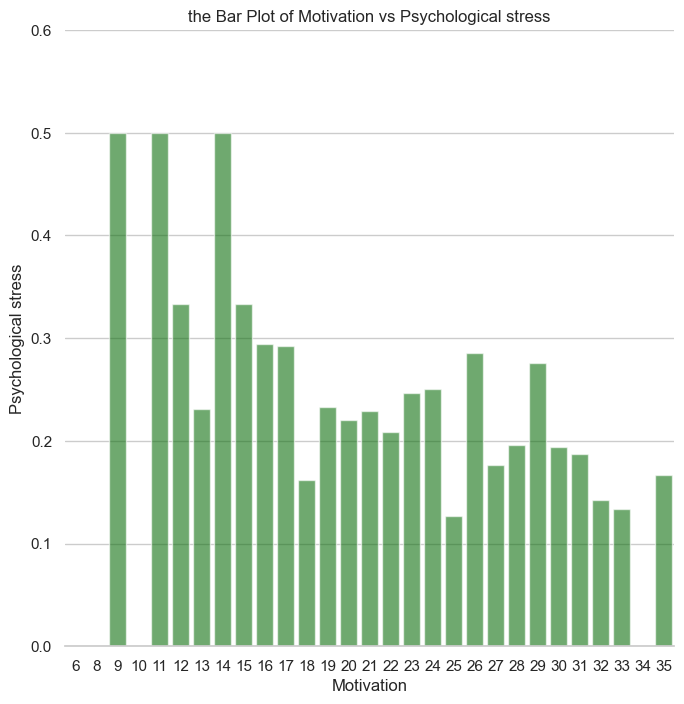

In [97]:
sb.set(style="whitegrid")
ax = sb.catplot(data = med_df,kind="bar",x="amsp", y= "psyt", color='green',errorbar=None,alpha=.6,width=0.8,height=7)
ax.despine(left=True)
ax.set_axis_labels("Motivation","Psychological stress")
ax.set(ylim=(0,0.6),title="the Bar Plot of Motivation vs Psychological stress")

<h3>
直觀上，根據Heatmap和上述兩張長條圖，可以看出當學術動機越高時，抑鬱值會跟著降低，心理壓力(平均看心理醫生的次數)也會降低
</h3>


-------------
<h2>檢定統計</h2>
<h3>
將amsp值小於等於20視為學習動機低，amsp大於20視為學習動機高

先檢定學習動機低vs抑鬱值 和 學習動機高vs抑鬱值 的資料是否為常態
</h3>
H0:資料為常態分佈

H1:資料非常態分布

In [125]:
amsp_cesd_smaller20_df = med_df['cesd'].loc[med_df['amsp']<=20]
print(scipy.stats.normaltest(amsp_cesd_smaller20_df))
amsp_cesd_larger20_df = med_df['cesd'].loc[med_df['amsp']>20]
print(scipy.stats.normaltest(amsp_cesd_larger20_df))

NormaltestResult(statistic=14.235146144962583, pvalue=0.0008107319531454808)
NormaltestResult(statistic=48.147835914707194, pvalue=3.506148233594576e-11)


<h3>兩者檢定後的pvalue，皆小於0.05，故兩者的資料不符合常態</h3>
<h3>因為資料不是常態分佈，所以使用non-parametric Kruskal-Wallis H-test</h3>
註: 無母數(non-parametric)分析資料不需為常態分布，也不需檢查資料是否為相同變異數

H0: 學術動機高低對抑鬱值無顯著影響

H1: 學術動機高低對抑鬱值有顯著影響

In [126]:
scipy.stats.kruskal (amsp_cesd_smaller20_df ,amsp_cesd_larger20_df)

KruskalResult(statistic=14.313706090942198, pvalue=0.0001547341486434679)

<h3>根據Kruskal-Wallis H-test的結果，

因為pvalue=0.0001547341486434679 < 0.05，棄卻H0，

因此在顯著水準為0.05的情況下，學習動機的高低對抑鬱值有顯著影響
</h3>

--------------------------------------------------------------------------
<h3>再來檢定學習動機低vs心理壓力 和 學習動機高vs心理壓力 的資料是否為常態</h3>
H0:資料為常態分佈

H1:資料非常態分布

In [127]:
amsp_psyt_smaller20_df = med_df['psyt'].loc[med_df['amsp']<=20]
print(scipy.stats.normaltest(amsp_psyt_smaller20_df))
amsp_psyt_larger20_df = med_df['psyt'].loc[med_df['amsp']>20]
print(scipy.stats.normaltest(amsp_psyt_larger20_df))

NormaltestResult(statistic=51.14309412094833, pvalue=7.841844350268351e-12)
NormaltestResult(statistic=126.63125980731674, pvalue=3.1795914070093522e-28)


<h3>兩者檢定後的pvalue，也都小於0.05，故兩者的資料不符合常態</h3>
<h3>所以使用non-parametric Kruskal-Wallis H-test</h3>

H0: 學術動機高低對心理壓力無顯著影響

H1: 學術動機高低對心理壓力有顯著影響

In [128]:
scipy.stats.kruskal (amsp_psyt_smaller20_df ,amsp_psyt_larger20_df)

KruskalResult(statistic=1.9371931550387227, pvalue=0.16397362129303494)

<h3>
根據Kruskal-Wallis H-test的結果，

因為pvalue=0.16397362129303494 > 0.05，不棄卻H0，

因此在顯著水準為0.05的情況下，學術動機高低對心理壓力無顯著影響
</h3>

-------------
<h2>結論</h2>

<h3>
透過無母數的Kruskal-Wallis H-test

我們發現在顯著水準為0.05的情況下，學術動機高低對抑鬱值有顯著影響，學術動機高低對心理壓力無顯著影響
</h3>

<h3>
Insight: 當我們有強烈的學習動機，就能較有耐心的學習，不容易在學習上感到憂鬱，但造成心理壓力的因素可能不限於學習方面，家庭、社交、學習環境都有可能影響心理壓力。
</h3>